# Introduction

## Principle of a neural network

- </span><span style="color:Tomato;font-weight: bold;"> Receiving information (signal) </span>

- </span><span style="color:Tomato;font-weight: bold;"> Activation,processing of information by the neuron</span>

- </span><span style="color:Tomato;font-weight: bold;">Transfer of processed information to other neurons </span>

</span><span style="color:white;font-weight: bold;">Reinforcement of certain links = LEARNING </span>

# The perceptron: a 1-layer neural network

-   Mathematical description of how a neuron works

![](images/reseau-1.png)

Information processing

*d*(*X*) = *a*<sub>0</sub> + *a*<sub>1</sub> *x*<sub>1</sub> + *a*<sub>2</sub> *x*<sub>2</sub> + *a*<sub>3</sub> *x*<sub>3</sub>
.

------------------------------------------------------------------------

-   Transfer function <span style="color:Tomato;"> Heaviside </span>

![](images/heaviside-1.png)

Information transferred

1.  If *d*(*X*) \> 0 → *Y* = 1
2.  If *d*(*X*) \< 0 → *Y* = 0

</p>
<p style="background-color:Tomato;color:white;">
Binary classification, the separator is a linear combination of the
starting variables (depending on the dimensions: straight line, plane
etc.)
</p>

------------------------------------------------------------------------

## Example of learning with function `and`

-   Function `and`


|  x1 |  x2 |   y |
|----:|----:|----:|
|   0 |   0 |   0 |
|   0 |   1 |   0 |
|   1 |   0 |   0 |
|   1 |   1 |   1 |

</span><span style="color:MediumSeaGreen;font-weight:bold;"> Main stages of the Neural process </span>

1.  Randomly mix the observations
2.  Randomly initialize the coefficients
    (*a*<sub>0</sub>,*a*<sub>1</sub>,*a*<sub>2</sub>).
3.  Pass the observations one by one
    -   Calculate the prediction error for the observation
    -   Update coefficients
4.  Until convergence of the process (zero error)

→ </span><span style="color:orange; font-weight:bold;"> Separation line
</span>

![](images/unnamed-chunk-2-1.png)

Remark : An observation can be repeated several times.

------------------------------------------------------------------------

-   **Illustration**

Random initialization of coefficients: *a*<sub>0</sub> =  − 0.0.25,
*a*<sub>1</sub> = 0.2 and *a*<sub>2</sub> = 0.05, i.e. 

*d*(*X*) =  − 0.025 + 0.2 *x*<sub>1</sub> + 0.05 *x*<sub>2</sub>

Computation of the separation line, set *d*(*X*) = 0 and get the lines
equation *x*<sub>2</sub> =  − 4.0 *x*<sub>1</sub> + 0.5.

</p>
<p style="background-color:orange;color:white;font-weight:bold&intalic;">
Rules for updating coefficients:
a<sub>j</sub> → a<sub>j</sub> + Δ a<sub>j</sub>
</p>

![](images/unnamed-chunk-3-1.png)

*Δ* *a*<sub>*j*</sub> = *η* (*y*−*ŷ*) *x*<sub>*j*</sub>

-   Learning rate *η*: determines the learning amplitude

    -   Too small → Slow convergence
    -   Too big → oscillation
    -   In the example: 0.1

-   Prediction error (*y*−*ŷ*): determines whether the coefficients need
    to be updated

-   Signal strength of the variable *x*<sub>*j*</sub> (variables are
    generally standardised)

------------------------------------------------------------------------

</span><span style="color:white">An update function is created</span>.

In [59]:

import numpy as np

def maj(a, mydata, eta=0.1, indiv=0, bias=True):
    if bias:
        mydata = np.hstack((np.ones((mydata.shape[0], 1)), mydata))
    
    dX = np.dot(mydata[indiv, :-1], a)
    y_hat = 0 if dX < 0 else 1
    delta_a = np.array([eta * (mydata[indiv, -1] - y_hat) * mydata[indiv, j] for j in range(len(a))])
    
    return a + delta_a

<span style="color:white">We update the coefficients (random
order)</span>

In [60]:
# Example data
mydata = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

a_init = np.array([-0.025, 0.200, 0.050])
a_loops1 = maj(a=a_init, mydata=mydata, indiv=2)
a_loops2 = maj(a=a_loops1, mydata=mydata, indiv=3)
#...

print("Updated weights after first iteration:", a_loops1)
print("Updated weights after second iteration:", a_loops2)

Updated weights after first iteration: [-0.125  0.1    0.05 ]
Updated weights after second iteration: [-0.125  0.1    0.05 ]


<span style="color:white">We continue as long as the coefficients (also
called weights) have not been stabilized.</span>

------------------------------------------------------------------------

## Criteria to be optimised

</p>
<p style="background-color:MediumSeaGreen;color:white;font-weight:bold;">
When is the algorithm considered to have converged?
</p>

-   In the example `and`, no more updates are made when the prediction
    error is zero for all individuals. Then, weights are stable and
    define the separation line.

</span><span style="color:orange; font-weight:bold;">Problem: Algorithm
don’t necessarily converges to the true solution (non-linear separation,
for example) or it converges too slowly.</span>

</p>
<p style="background-color:Tomato;color:white;">
Need to define a Loss Function.
</p>

Let’s take the example of the least squares with our `and` use case
where *ŷ*(*ω*) = Heaviside(*d*(*X*(*ω*))), *ω* designates the
individual.

*Loss Function* = ∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup>

1.  A minimum value is set for the Least Square minimization (instead of
    0).
2.  A minimum (significant) reduction of the Least Square is set to
    define if we stop the updating or not.
3.  We set a maximum number of iterations.

</p>
<p style="background-color:Tomato;color:white;">
These parameters (1),(2),(3) become `parameters` of the minimization of
the loss function.
</p>

------------------------------------------------------------------------

## Loss function

For classification, other loss functions are generally used instead of
the least squares. It includes:

-   Binary cross-entropy

∑<sub>*ω*</sub> − *y*(*ω*)ln (*ŷ*(*w*)) − (1−*y*(*ω*))ln (1−*ŷ*(*ω*))

-   Categorical cross-entropy (generalization to more than 2 classes,
    with dummy variables)

∑<sub>*ω*</sub>∑<sub>*i* ∈ *nb.classes*</sub> − *y*<sub>*i*</sub>(*ω*)ln (*ŷ*<sub>*i*</sub>(*ω*))

-   Hinge loss (used in SVM). The variable *Y* is coded { − 1,  + 1}.

∑<sub>*ω*</sub>*max*(0 , 1−*y*(*w*)*ŷ*(*w*))

------------------------------------------------------------------------

## Regularisation
When the explanatory variables are correlated or if the number of
variables *p* exceeds the number of observations *n*, constraints are
set to make the model robust and estimable.

-   Constraints using the *L*<sub>2</sub> norm (Ridge Regression).

*Loss Function*  = ∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup> + *λ*∑<sub>*j*</sub>*a*<sub>*j*</sub><sup>2</sup>

-   Other constraints are possible, such as the *L*<sub>1</sub> norm
    (Lasso)…

The higher the *λ*, the heavier the constraints are imposed on the
coefficients, with the danger of underlearning.

------------------------------------------------------------------------
## Gradient descent algorithm for the loss function

Let’s look at the gradient descent algorithm.

![](/document/imagegradient-1.png)

The update is always incremental,
*a*<sub>*j*</sub> → *a*<sub>*j*</sub> + *Δ* *a*<sub>*j*</sub> where

$$\Delta a_j = -\eta \\ \frac{\partial LossFunction }{\partial a_j}=-\eta \text{ gradient}\_{a_j}$$

------------------------------------------------------------------------

## Usual gradient descent (quadratic loss)

With the least squares loss function
∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup> where
*ŷ*(*ω*) = *f*(*d*(*X*(*ω*)=*a*<sub>0</sub>+…+*a*<sub>*j*</sub>*x*<sub>*j*</sub>(*ω*)+…))
The result is

$$\Delta a_j = -\eta \\ \frac{\partial LossFuntion }{\partial a_j}= -\eta \\ \frac{\partial LossFuntion }{\partial f(d(X))}\frac{\partial f(d(X))}{\partial d(X)}\frac{\partial d(X)}{\partial a_j}$$

Hence
*Δ* *a*<sub>*j*</sub> =  − *η*∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))*f*′(*d*(*X*(*ω*))) *x*<sub>*j*</sub>(*ω*)

and the update of the weights (*a*<sub>*j*</sub>) is done after
processing all the data (observations *ω*).

→ </span><span style="color:orange; font-weight:bold;"> Slowness problem
</span> because it requires a lot of computations on large databases.

</p>
<p style="background-color:MediumSeaGreen;color:white">
note: in the case of the *L*<sub>2</sub> norm the gradient is slightly
modified to incorporate the constraint.
</p>

*Δ* *a*<sub>*j*</sub> =  − *η* (*y*−*ŷ*)*f*′(*d*(*X*)) *x*<sub>*j*</sub> + *λ* *a*<sub>*j*</sub>

------------------------------------------------------------------------

## Stochastic gradient

</p>
<p style="background-color:Tomato;color:white;">
Stochastic gradient (online)
</p>

You can choose an increment for each individual. Example of quadratic
loss:
*Δ* *a*<sub>*j*</sub> =  − *η* (*y*−*ŷ*)*f*′(*d*(*X*)) *x*<sub>*j*</sub>
This incremental approach (with weights updated as each individual
passes through) speeds up the process. The individuals are mixed
randomly at the start.

→ </span><span style="color:orange; font-weight:bold;"> Instability
problem </span>

</p>
<p style="background-color:Tomato;color:white;">
Stochastic gradient (mini-batch)
</p>

This approach, based on blocks of individuals, makes it possible to
accumulate advantages of the incremental approach (speed of convergence)
with less instability (smoothing).

</p>
<p style="background-color:Tomato;color:white;">
Interest of the stochastic or non-stochastic gradient algorithm.
</p>

1.  No matrix inversion (Allows the use of correlated descriptors)
2.  Can be programmed in very large dimensions
3.  Easy to update if new individuals are added to the database

------------------------------------------------------------------------

## Variant in the gradient descent algorithm

1.  Variable learning rate *η*, a high rate at the start *η*<sub>0</sub>
    to converge quickly which decreases as a function of the iteration
    *s* or the performance of the algorithm:

    -   *η* as a function of *s*:
        $\eta(s) = \frac{\eta_0}{1 + s \\ \eta_d}$ or
        $\eta(s) = \frac{\eta_0}{s^d}$.
    -   Adaptive *η* value: as soon as the gradient stagnates, *η* is
        reduced (e.g. divided by 5).

2.  Update using a memory algorithm: To smooth the path to the minimum
    (to limit oscillations), we can use the update from the previous
    iteration step *s* − 1 to calculate the new update at iteration *s*:

$$\Delta a_j^{(s)} = -\eta \\ \frac{\partial LossFunction }{\partial a_j} + \mu \Delta a_j^{(s-1)}$$

(0≤*μ*\<1) is an additional parameter to be fixed: when (*μ*=0) we have
the usual gradient descent and by default (*μ*=0.9) in scikit-learn.

------------------------------------------------------------------------

## Transfer function: often a Sigmoid function

Let’s take a continuous and therefore derivable transfer function, like
the logistic function *f*, with derivative
*f*′(*ν*) = *f*(*ν*) (1−*f*(*ν*)).

$$\hat{y}(\omega) = f(d(X(\omega)))=\frac{1}{1+e^{-d(X)}}$$

![](images/logistique-1.png)

The function *f* is an estimate of *P*(*Y*/*X*), so the decision rule
becomes :

If f(d(X)) \> 0.5 Then Y=1 Otherwise Y=0

Estimating the probability *P*(*Y*/*X*) can be used later for scoring
purposes.

------------------------------------------------------------------------

## Other activation-transfer functions

Different types of activation functions can be used depending on the
problem to be addressed (classification or regression, linear or
non-linear), the definition of the intermediate spaces and the filtering
required.

![](images/plotdata-1.png)

-   Linear function *f*(*ν*) = *ν*
    <span style="color:MediumSeaGreen;">for regression.</span>

-   ReLu function (Rectified Linear units) *f*(*ν*) = max (0,*ν*)
    <span style="color:MediumSeaGreen;">to filter.</span>

-   Hyperbolic tangent function $f(\nu)=\frac{e^{2\nu}-1}{e^{2\nu}+1}$
    <span style="color:MediumSeaGreen;">for classification.</span> Note:
    The variable *Y* is coded { − 1,  + 1}.

------------------------------------------------------------------------

# Multi-layer perceptron (PMC)

PMC property: has a hidden layer of neurons that can approximate any
continuous function (depends on the number of neurons).

</p>
<p style="background-color:Tomato;color:white;">
The different stages of the PMC
</p>

-   Partition training - testing datasets
-   Pre-treatment
-   PMC
-   Prediction

![The loss function allows coefficients (weights) to be optimised by feedback](images/schema.jpg)

<span style="font-size:50%">Image credit: Deep Learning with R, Chollet
et al</span>

------------------------------------------------------------------------

## Backpropagation

Let *x* = *f*(*w*), *y* = *f*(*x*), *z* = *f*(*y*). We want to compute
the gradient of *z* with respect to *w*:

$$\frac{\partial z}{\partial w}= \frac{\partial z}{\partial y}\frac{\partial y}{\partial x}\frac{\partial x}{\partial w}= f'(y)f'(x)f'(z)$$

![Computational graph for backpropagation](images/computationalgraph.jpg)

<span style="font-size:50%">Image credit: Deep Learning, Goodfellow et
al</span>

------------------------------------------------------------------------

## Limits and benefits of PMC

1.  Highly accurate classifier (if well parameterised) with

-   Incrementality
-   Scalability

2.  Black box model with

-   Difficulty of parameterisation (number of neurons in the hidden
    layer)
-   Convergence problem (local optimum)
-   Danger of overlearning (too many neurons in the hidden layer)

3. the CNN adds: 

- feature detection 
- different scales 
- details 
- already built-in models allows transferring

![Transferring from CNN model](images/transfer_cnn.png)

------------------------------------------------------------------------

## Conclusion Machine and Deep Learning

![](images/ccl.jpg)

<span style="font-size:50%">Image credit: Deep Learning, Goodfellow et
al</span>

------------------------------------------------------------------------

# Use Case
Import the necessary libraries, including pandas, scikit-learn, and PyTorch.

In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

In [62]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


## Load and Preprocess Wine Data
Load the wine dataset from UCI repository, preprocess the data including train-test split and normalization.

In [63]:
import pandas as pd

# Charger les données depuis le fichier CSV
file_path = r'C:/Users/PC/OneDrive/Bureau/Data Manager/UE3/Project1/combined_data.csv'


# Charger les données avec des options pour gérer les valeurs manquantes
data = pd.read_csv(file_path, header=0, na_values=["", " ", "NA", "null"])


# Afficher un aperçu des données
print("Aperçu des données :")
print(data.head())



Aperçu des données :
     397.66    400.28     402.9    405.52    408.13    410.75    413.37  \
0  0.160989  0.152837  0.143099  0.132230  0.121732  0.113088  0.106684   
1  0.157316  0.148315  0.139275  0.129330  0.120090  0.112003  0.105155   
2  0.180705  0.171157  0.159826  0.147212  0.136382  0.126773  0.119723   
3  0.159618  0.151638  0.141948  0.131743  0.121592  0.112819  0.106271   
4  0.147031  0.139998  0.130906  0.121395  0.112400  0.104592  0.098618   

      416.0    418.62    421.24  ...    981.27    984.09     986.9    989.72  \
0  0.102206  0.097464  0.094226  ...  0.268508  0.268674  0.268942  0.269235   
1  0.100885  0.097040  0.093725  ...  0.277404  0.277630  0.277895  0.278252   
2  0.115086  0.109832  0.105594  ...  0.304266  0.304477  0.304762  0.305169   
3  0.101794  0.097496  0.094452  ...  0.270041  0.270336  0.270555  0.270984   
4  0.095303  0.091420  0.088122  ...  0.247827  0.248123  0.248419  0.248833   

     992.54    995.35    998.17   1000.99   100

In [69]:
# Display the first few rows of the dataset
data.head()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416.0,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,class
0,0.160989,0.152837,0.143099,0.132230,0.121732,0.113088,0.106684,0.102206,0.097464,0.094226,...,0.268508,0.268674,0.268942,0.269235,0.269651,0.270141,0.270695,0.271260,0.271902,canola
1,0.157316,0.148315,0.139275,0.129330,0.120090,0.112003,0.105155,0.100885,0.097040,0.093725,...,0.277404,0.277630,0.277895,0.278252,0.278681,0.279293,0.279852,0.280512,0.281131,canola
2,0.180705,0.171157,0.159826,0.147212,0.136382,0.126773,0.119723,0.115086,0.109832,0.105594,...,0.304266,0.304477,0.304762,0.305169,0.305732,0.306397,0.307044,0.307668,0.308387,canola
3,0.159618,0.151638,0.141948,0.131743,0.121592,0.112819,0.106271,0.101794,0.097496,0.094452,...,0.270041,0.270336,0.270555,0.270984,0.271544,0.272093,0.272727,0.273407,0.274073,canola
4,0.147031,0.139998,0.130906,0.121395,0.112400,0.104592,0.098618,0.095303,0.091420,0.088122,...,0.247827,0.248123,0.248419,0.248833,0.249397,0.249951,0.250570,0.251253,0.251939,canola


In [70]:
# Split the data into features and labels
X = data.drop('class', axis=1)
y = data['class']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Example test size proportions
splits = [0.2, 0.3, 0.4]

# Iterate through each test size
for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42, stratify=y)
    
    # Normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define and train the neural network model
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42, tol=1e-4)
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test size: {split}, Accuracy: {accuracy:.2f}")
    #Why 42? The number 42 is an arbitrary choice and is often used as a reference to the book The Hitchhiker's Guide to the Galaxy, where 42 is "the answer to the ultimate question of life, the universe, and everything." It has become a convention in the programming and data science community.

c:\Users\PC\miniconda3\envs\datascience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test size: 0.2, Accuracy: 0.94


c:\Users\PC\miniconda3\envs\datascience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Test size: 0.3, Accuracy: 0.92
Test size: 0.4, Accuracy: 0.91


c:\Users\PC\miniconda3\envs\datascience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
# Split the dataset with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Split the data into features and labels
X = data.drop('class', axis=1)
y = data['class']

In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert features and labels to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## Perceptron Model with scikit-learn
Implement a Perceptron model using scikit-learn, train it on the wine dataset, and evaluate its performance.

In [82]:
# Implement a Perceptron model using scikit-learn
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

In [83]:
# Train the Perceptron model
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [84]:
# Evaluate the Perceptron model
train_accuracy = perceptron.score(X_train, y_train)
test_accuracy = perceptron.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.62
Test Accuracy: 0.69


In [86]:
# Predictions
y_pred_perceptron = perceptron.predict(X_test)

# Confusion Matrix for Dense Network
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)

print(conf_matrix_perceptron)

[[2 1 0 0 2 0 1]
 [0 3 0 0 0 1 0]
 [0 0 0 0 0 0 3]
 [0 0 0 7 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 1 0 0 1 1]
 [0 0 0 0 0 0 4]]


## Multilayer Perceptron with scikit-learn
Implement a Multilayer Perceptron (MLP) using scikit-learn, train it on the wine dataset, and evaluate its performance.

In [87]:
# Implement a Multilayer Perceptron (MLP) using scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001,
                    solver='adam', random_state=42, tol=1e-4)

In [88]:
# Train the MLP model
mlp.fit(X_train, y_train)

c:\Users\PC\miniconda3\envs\datascience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [89]:
# Evaluate the MLP model
train_accuracy_mlp = mlp.score(X_train, y_train)
test_accuracy_mlp = mlp.score(X_test, y_test)

print(f'MLP Training Accuracy: {train_accuracy_mlp:.2f}')
print(f'MLP Test Accuracy: {test_accuracy_mlp:.2f}')

MLP Training Accuracy: 0.99
MLP Test Accuracy: 0.97


In [90]:
# Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix for MPL
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print(conf_matrix_mlp)

[[5 0 0 0 0 0 1]
 [0 4 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 7 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 4]]


## Dense Network with PyTorch
Implement a Dense Network using PyTorch, train it on the wine dataset, and evaluate its performance.

In [91]:
# Define the Dense Network model using PyTorch without class definition
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(y.unique())

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Softmax(dim=1)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 300

In [92]:
# Train the Dense Network model
losses = []  # List to store loss values
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())  # Store the loss value
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/300], Loss: 1.3420
Epoch [100/300], Loss: 1.2302
Epoch [150/300], Loss: 1.1958
Epoch [200/300], Loss: 1.1841
Epoch [250/300], Loss: 1.2015
Epoch [300/300], Loss: 1.1730


In [93]:
# Evaluate the Dense Network model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    test_accuracy_dense = correct / total
    print(f'Dense Network Test Accuracy: {test_accuracy_dense:.2f}')

Dense Network Test Accuracy: 1.00


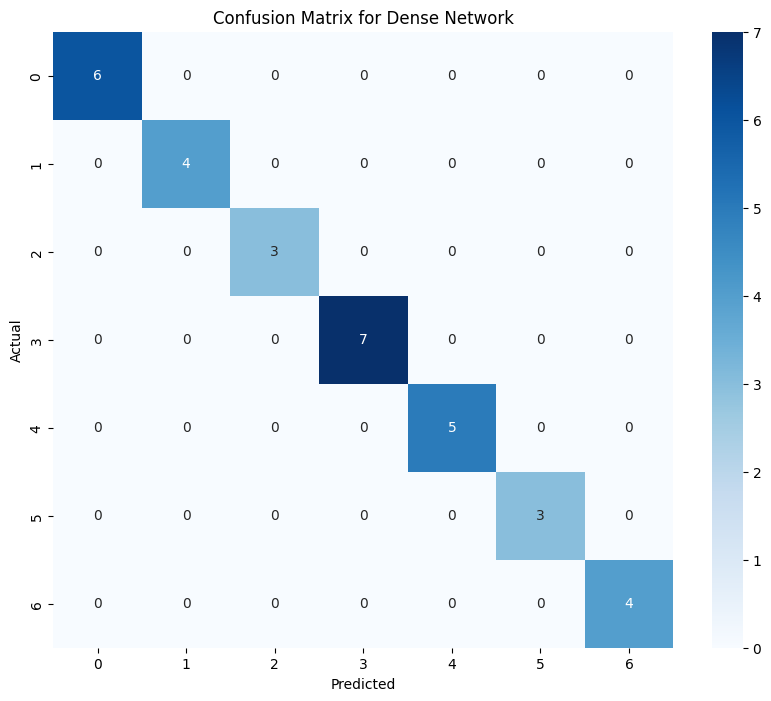

tensor([[3.6844e-05, 7.4388e-05, 9.0127e-20, 4.0781e-11, 9.9989e-01, 1.9328e-18,
         5.2159e-17],
        [9.3214e-07, 2.5137e-07, 5.0171e-20, 2.8484e-12, 1.0000e+00, 9.4416e-18,
         1.8365e-15],
        [6.5263e-03, 3.6362e-06, 3.7860e-02, 3.8753e-06, 2.6998e-06, 2.5338e-03,
         9.5307e-01],
        [3.8833e-06, 3.1124e-07, 9.9767e-01, 1.7590e-08, 2.6836e-11, 1.3841e-03,
         9.3835e-04],
        [3.2544e-29, 9.0885e-15, 1.5524e-27, 1.0000e+00, 1.0313e-22, 9.5510e-18,
         1.6543e-23],
        [1.1207e-08, 1.0000e+00, 4.4477e-10, 7.2617e-07, 2.0183e-07, 5.5279e-10,
         6.4505e-15],
        [8.2807e-06, 5.4745e-05, 4.1556e-21, 2.1321e-11, 9.9994e-01, 2.8898e-19,
         5.1467e-19],
        [6.9990e-02, 4.1940e-06, 6.2888e-01, 1.9398e-06, 1.6809e-07, 1.3240e-03,
         2.9980e-01],
        [2.3040e-04, 8.1600e-05, 1.7950e-17, 3.6187e-10, 9.9969e-01, 8.0684e-16,
         2.6085e-14],
        [1.8394e-07, 6.4871e-10, 8.5384e-05, 1.6128e-09, 2.0535e-08, 1.48

In [95]:
# Use the DataLoader to iterate on test data
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Passez les données à travers le modèle pour obtenir les probabilités
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix for Dense Network
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot of the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Dense Network')
plt.show()        
        
# Individual class probabilities
print(outputs)

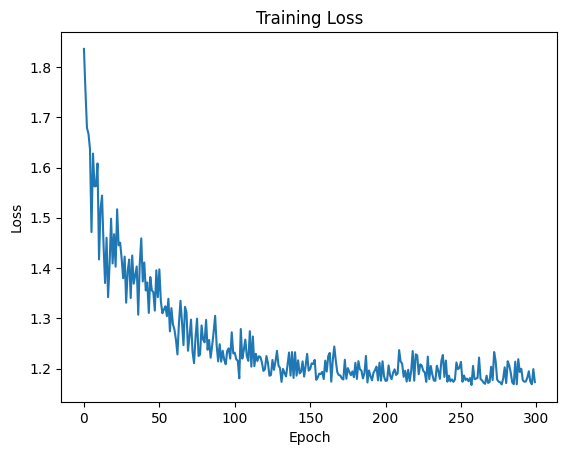

In [96]:
# Plot the training loss
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Appendix : Class definition

In [97]:
# Define the Dense Network model using PyTorch
class DenseNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DenseNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        #self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [98]:
# Set the parameters for the model
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(y.unique())
learning_rate = 0.001
num_epochs = 300

In [99]:
# Initialize the model, loss function, and optimizer
model = DenseNetwork(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [50/300], Loss: 0.3483
Epoch [100/300], Loss: 0.1273
Epoch [150/300], Loss: 0.0911
Epoch [200/300], Loss: 0.0814
Epoch [250/300], Loss: 0.0127
Epoch [300/300], Loss: 0.0254


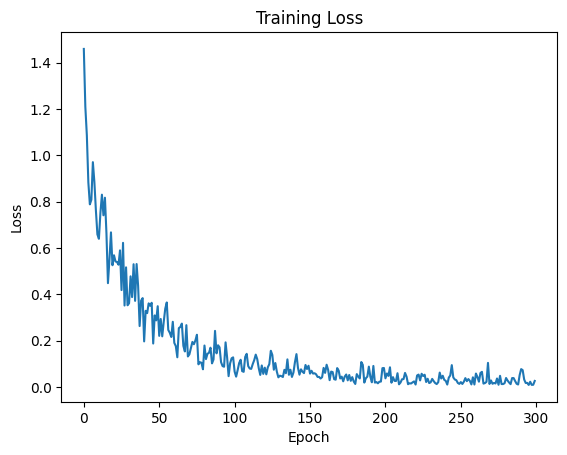

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim

# Définir la classe DenseNetwork
class DenseNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DenseNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        # Pas besoin d'ajouter nn.Softmax ici, car CrossEntropyLoss le gère automatiquement

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)  # Sorties brutes (logits)
        return x

# Initialiser les paramètres du modèle
input_size = X_train.shape[1]  # Nombre de caractéristiques
hidden_size = 100  # Nombre de neurones dans la couche cachée
output_size = len(y.unique())  # Nombre de classes
learning_rate = 0.001
num_epochs = 300

# Initialiser le modèle, la fonction de perte et l'optimiseur
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DenseNetwork(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()  # Fonction de perte
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entraîner le modèle
losses = []  # Liste pour stocker les valeurs de perte
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Déplacer les données sur le bon appareil
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Réinitialiser les gradients
        optimizer.zero_grad()
        
        # Passer les données à travers le modèle
        outputs = model(batch_X)
        
        # Calculer la perte
        loss = criterion(outputs, batch_y)
        
        # Rétropropagation
        loss.backward()
        
        # Mettre à jour les poids
        optimizer.step()
    
    # Stocker la perte pour chaque époque
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Afficher la courbe de perte
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [103]:
# Evaluate the Dense Network model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    test_accuracy_dense = correct / total
    print(f'Dense Network Test Accuracy: {test_accuracy_dense:.2f}')

Dense Network Test Accuracy: 0.97


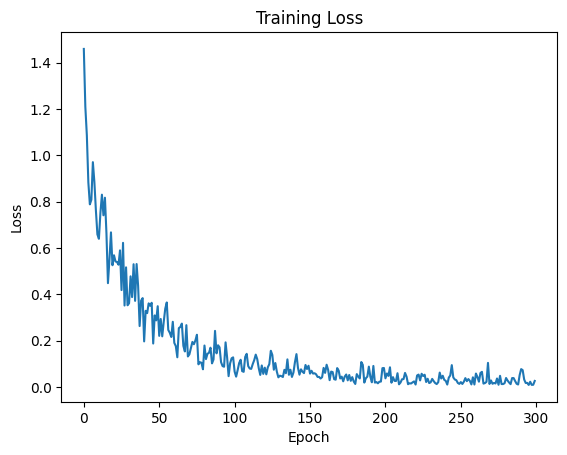

In [104]:
# Plot the training loss
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()